In [28]:
import csv
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df=pd.read_csv("2019_nCoV_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 7 columns):
Sno               368 non-null int64
Province/State    302 non-null object
Country           368 non-null object
Last Update       368 non-null object
Confirmed         368 non-null float64
Deaths            368 non-null float64
Recovered         368 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 20.2+ KB


In [15]:
df['Province/State']

0                 Anhui
1               Beijing
2             Chongqing
3                Fujian
4                 Gansu
5             Guangdong
6               Guangxi
7               Guizhou
8                Hainan
9                 Hebei
10         Heilongjiang
11                Henan
12            Hong Kong
13                Hubei
14                Hunan
15       Inner Mongolia
16              Jiangsu
17              Jiangxi
18                Jilin
19             Liaoning
20                Macau
21              Ningxia
22              Qinghai
23              Shaanxi
24             Shandong
25             Shanghai
26               Shanxi
27              Sichuan
28               Taiwan
29              Tianjin
             ...       
338               Jilin
339            Xinjiang
340             Guizhou
341             Ningxia
342           Hong Kong
343              Taiwan
344               Macau
345             Qinghai
346               Tibet
347          Washington
348            I

In [16]:
df.head(5)

,Sno,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,Anhui,China,1/22/2020 12:00,1.0,0.0,0.0
1,2,Beijing,China,1/22/2020 12:00,14.0,0.0,0.0
2,3,Chongqing,China,1/22/2020 12:00,6.0,0.0,0.0
3,4,Fujian,China,1/22/2020 12:00,1.0,0.0,0.0
4,5,Gansu,China,1/22/2020 12:00,0.0,0.0,0.0


In [17]:
df.describe()

,Sno,Confirmed,Deaths,Recovered
count,368.000000,368.000000,368.000000,368.000000
mean,184.500000,68.638587,1.600543,1.290761
std,106.376689,348.146908,12.819038,7.721637
min,1.000000,0.000000,0.000000,0.000000
25%,92.750000,2.000000,0.000000,0.000000
50%,184.500000,7.000000,0.000000,0.000000
75%,276.250000,33.500000,0.000000,0.000000
max,368.000000,4586.000000,162.000000,90.000000


## Visualization

In [19]:
unique_dates=list(df['Last Update'].unique())
unique_dates

['1/22/2020 12:00',
 '1/23/20 12:00 PM',
 '1/24/2020 12:00 PM',
 '1/25/2020 10:00 PM',
 '1/25/2020 12:00 PM',
 '1/26/2020 23:00',
 '1/27/2020 20:30',
 '1/28/2020 23:00',
 '1/28/2020 18:00',
 '1/29/2020 21:00']

In [21]:
confirmed=[]
recovered=[]
deaths=[]
for x in unique_dates:
    confirmed.append(df[df['Last Update']== x]['Confirmed'].sum())
    recovered.append(df[df['Last Update']== x]['Recovered'].sum())
    deaths.append(df[df['Last Update']== x]['Deaths'].sum())


In [23]:
to_plot = pd.DataFrame()
to_plot['Last Update'] = unique_dates
to_plot['confirmed'] = confirmed
to_plot['recovered'] = recovered
to_plot['deaths'] = deaths

to_plot.head(10)

,Last Update,confirmed,recovered,deaths
0,1/22/2020 12:00,554.0,0.0,0.0
1,1/23/20 12:00 PM,653.0,30.0,18.0
2,1/24/2020 12:00 PM,939.0,36.0,26.0
3,1/25/2020 10:00 PM,1156.0,43.0,52.0
4,1/25/2020 12:00 PM,860.0,6.0,4.0
5,1/26/2020 23:00,2793.0,54.0,80.0
6,1/27/2020 20:30,4472.0,63.0,107.0
7,1/28/2020 23:00,6052.0,110.0,132.0
8,1/28/2020 18:00,1.0,0.0,0.0
9,1/29/2020 21:00,7779.0,133.0,170.0


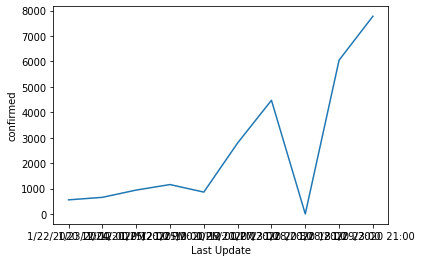

In [24]:
sns.lineplot(data=to_plot,x="Last Update",y="confirmed")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

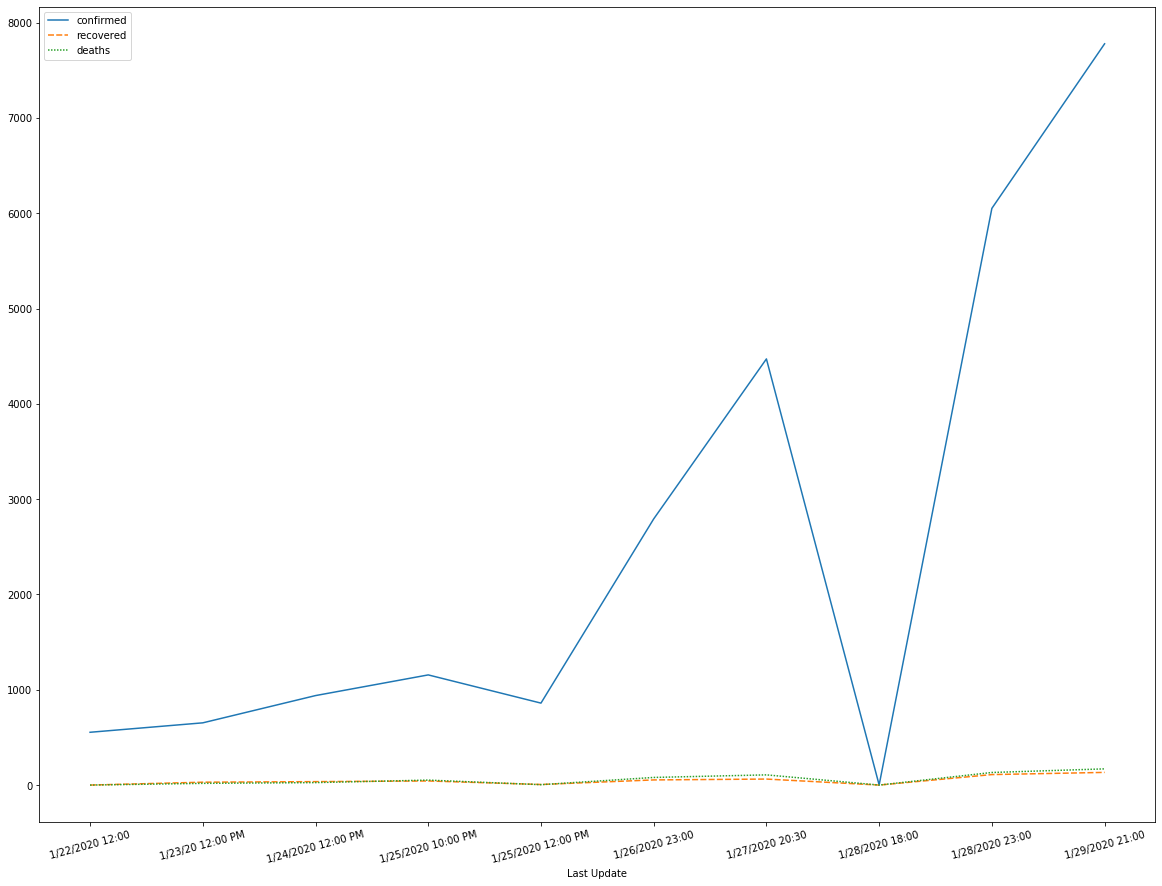

In [30]:
line_plot = to_plot.set_index('Last Update')
plt.figure(figsize=(20,15))
sns.lineplot(data=line_plot)
plt.xticks(rotation=15)